# Proyek Analisis Data: Bike Sharing
- **Nama:** Shiera Mustika Belbina
- **Email:** shieramustikabelbina@gmail.com
- **ID Dicoding:** shierabelbi


## Menentukan Pertanyaan Bisnis

- How do weather conditions affect total bicycle rentals?
- How do bicycle rental rates differ on holiday and weekday in each season?
- When does bikesharing get the most orders each year?

## Import Semua Packages/Library yang Digunakan

Import packages numpy, pandas, seaborn, and matplotlib.pyplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Upload the day.csv dataset to Google Colab

In [2]:
from google.colab import files
files.upload()

Saving day.csv to day.csv


{'day.csv': b'instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985\r\n2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801\r\n3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349\r\n4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562\r\n5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600\r\n6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606\r\n7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510\r\n8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959\r\n9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822\r\n10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321\r\n11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263\r\n12,2011-01-

The uploaded dataset is read first, then the top 5 data are taken to be displayed

In [3]:
data_day = pd.read_csv('day.csv')
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Information from the data in each column is viewed

In [4]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Check the number of missing values ​​in the data

In [5]:
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Check for duplication of data

In [6]:
print("Jumlah duplikasi: ", data_day.duplicated().sum())
data_day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


At the data assessment stage, it can be concluded that the data is clean
from missing values ​​and duplication. However, there is some data whose data type is not appropriate.

### Cleaning Data

Changing data types dteday, season, yr, minth, holiday, weekday, workingday, weathersit on inappropriate data

In [7]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_day['season'] = data_day.season.astype('category')
data_day['yr'] = data_day.yr.astype('category')
data_day['mnth'] = data_day.mnth.astype('category')
data_day['holiday'] = data_day.holiday.astype('category')
data_day['weekday'] = data_day.weekday.astype('category')
data_day['workingday'] = data_day.workingday.astype('category')
data_day['weathersit'] = data_day.weathersit.astype('category')

In [8]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Labeling data of the 'category' data type

In [9]:
data_day.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
data_day.yr.replace((0,1), (2011, 2012), inplace=True)
data_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), inplace=True)
data_day.weekday.replace((0,1,2,3,4,5,6), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)
data_day.workingday.replace((0,1), ('No', 'Yes'), inplace=True)
data_day.weathersit.replace((1,2,3,4), ('Clear', 'Misty', 'Light_SnowRain', 'Heavy_SnowRain'), inplace=True)
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

View a summary of statistical parameters from 'day' data

In [10]:
data_day.describe(include="all")

<ipython-input-10-4093f0a64953>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.0,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2.0,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012.0,January,0.0,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366.0,62,710.0,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Grouping customers by season to produce a pivot table

In [11]:
data_day.groupby(by="season").agg({
    "season": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

season   cnt                                
       nunique   max   min         mean          std
season                                              
Spring       1  7836   431  2604.132597  1399.942119
Summer       1  8362   795  4992.331522  1695.977235
Fall         1  8714  1115  5644.303191  1459.800381
Winter       1  8555    22  4728.162921  1699.615261

Grouping customers based on weather conditions to produce a pivot table

In [12]:
data_day.groupby(by="weathersit").agg({
    "season": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

season   cnt                               
               nunique   max  min         mean          std
weathersit                                                 
Clear                4  8714  431  4876.786177  1879.483989
Misty                4  8362  605  4035.862348  1809.109918
Light_SnowRain       4  4639   22  1803.285714  1240.284449

See the distribution of the number of customers based on working days

In [13]:
data_day.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

workingday
Yes    487
No     223
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Question 1: how do weather conditions affect total bicycle rentals?

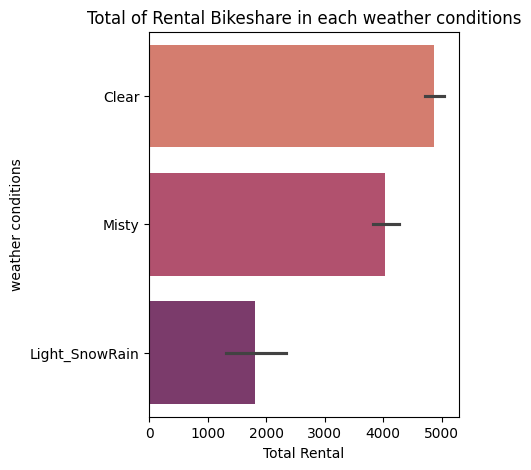

In [14]:
plt.figure(figsize=(4,5))
sns.barplot(x='cnt', y='weathersit', data=data_day, hue='weathersit', palette="flare", orient="h")

plt.xlabel("Total Rental")
plt.ylabel("weather conditions")
plt.title("Total of Rental Bikeshare in each weather conditions")

plt.show()

Weather conditions have a big influence on the average bicycle rental rate. on average, bicycle rentals occur most often when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy and the least occurs when the weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Question 2: How do bicycle rental rates differ on holiday and weekday in each season?

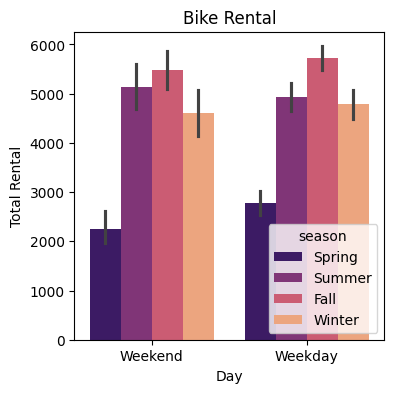

In [15]:
plt.figure(figsize=(4, 4))
sns.barplot(x='workingday', y='cnt', data=data_day, palette='magma', hue='season')

plt.title('Bike Rental')
plt.xlabel('Day')
plt.ylabel('Total Rental')
plt.xticks([0, 1], ['Weekend', 'Weekday'])

plt.show()

Weekdays have the highest average rental rates compared to weekends. Fall is the season when most people rent bicycles on weekends and weekdays. Spring is the season with the fewest people renting bicycles

### Question 3: When does bikesharing get the most orders each year?

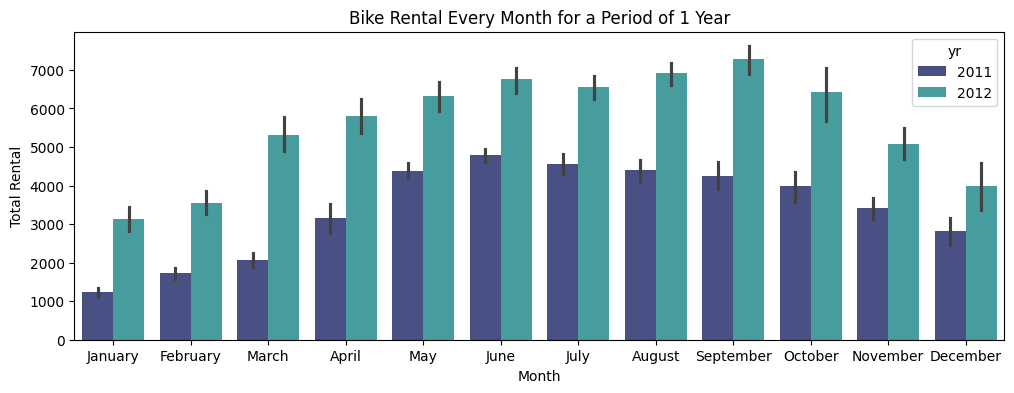

In [16]:
plt.figure(figsize=(12, 4))
sns.barplot(x='mnth', y='cnt', data=data_day, palette='mako', hue='yr')

plt.title('Bike Rental Every Month for a Period of 1 Year')
plt.xlabel('Month')
plt.ylabel('Total Rental')

plt.show()

In 2011 bikesharing got the most orders in June at around 5000. In 2012 bikesharing got the most orders in September with a total of more than 7000 orders

## Conclusion

- Conclusion to question 1 : Weather conditions have a big influence on the average bicycle rental rate. On average the most bicycle rentals occur when the weather is Clear with a total of almost 5000 renters. When the weather is misty there are around 4000 people who rent bicycles. The lowest total rentals occur when the weather is Light Snow, Light Rain only reached around 2000. This is because when the weather is clear, people are more likely to be outdoors and choose to rent bicycles, when the weather is light rain and snow many people choose to stay and not be outside. When the weather is rainy and snowy, people choose not to be outdoors, therefore no one rents bicycles

- Conclusion to question 2 : On weekends the most rentals are in the fall season with a total of around 5500 and the least are in the spring season with a total of approximately 2500. On weekdays the most rentals are in the fall season with a total of almost more than 5500 and the least are in the spring season with the total is approximately 3000. Each season on weekdays has a greater total number of rentals than on weekends. However, in the summer season the total number of bicycle rentals is greater on weekends than weekdays. This is because in the summer season usually many people are on summer vacation and this is what makes the summer season have high total rentals on weekends.

- Conclusion to question 3 : Bicycle rental orders increased from 2011 to 2012. In 2011 the most rentals occurred in June with a total of approximately 5000 orders, while the least occurred in January with a total of around 1000 orders. in 2012 the most rentals occurred in September with a total of more than 7000 orders, while the least occurred in January with a total of around 3000 orders

In [17]:
data_day.to_csv("all_data.csv", index=False)